Test Accuracy: 36.84%


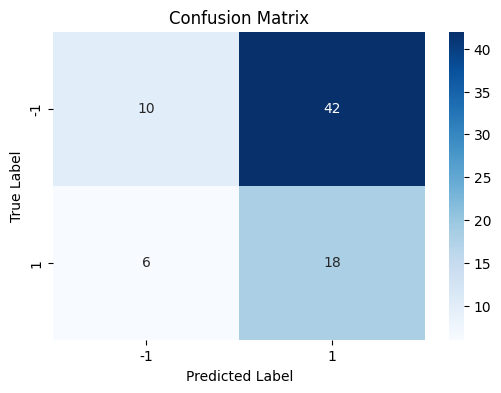

IndexError: ignored

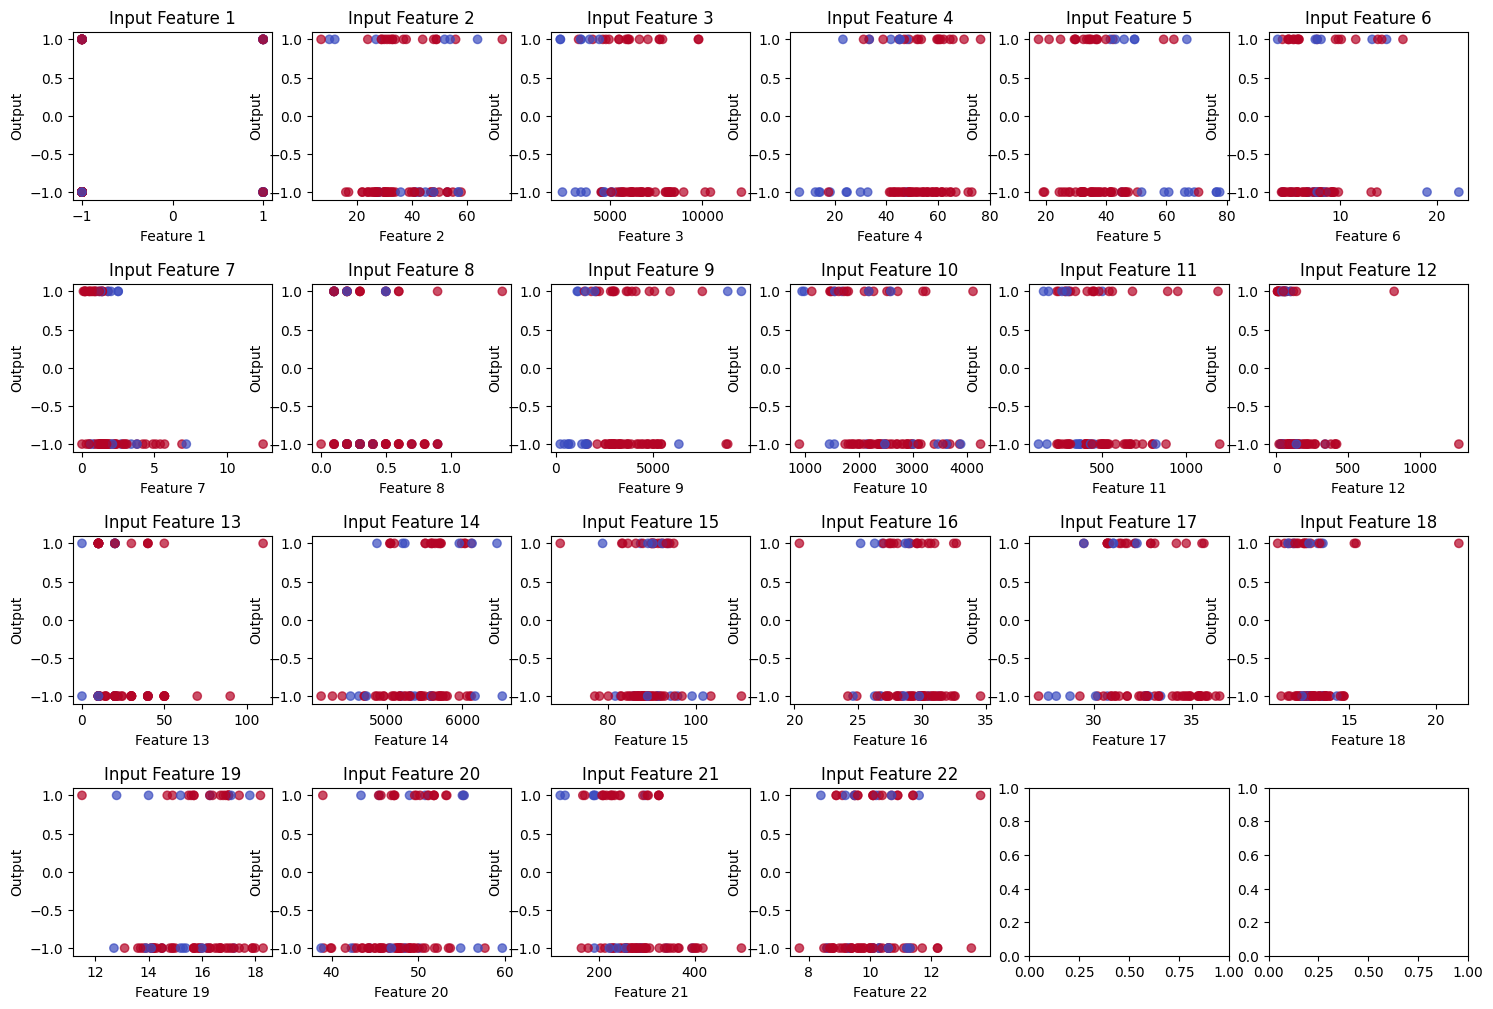

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix

def initialize_hardcoded_weights():
    # Hard-coded weights
    weights_hidden = np.array([[-0.22053999, -0.37296278, -0.02829358, -0.437973, 0.21012419,
                                0.0965679, 0.25660129, 0.91341797, -0.41821202, -0.04577194,
                                0.39734756, -0.1681225, 0.23968694, 0.16892982, 0.20000755,
                                0.1876415, 0.27974428, 0.11052719, 0.43349842, -0.06705131,
                                0.19838442, 0.18974797, 0.22496692]])

    weights_output = np.array([[0.33327476, -1.31242166]])

    return [weights_hidden, weights_output]

# Load data
df = pd.read_csv('/content/CBCovid19EC (1).csv')

# Inputs
X = df[['sexnum', 'age', 'leukocytes', 'neutrophilsP', 'lymphocytesP', 'monocytesP', 'eosinophilsP', 'basophilsP',
        'neutrophils', 'lymphocytes', 'monocytes', 'eosinophils', 'basophils', 'redbloodcells', 'mcv', 'mch', 'mchc',
        'rdwP', 'hemoglobin', 'hematocritP', 'platelets', 'mpv']]

# Target Output
Y = df['PCR'].values.reshape(-1, 1)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Learning Rate
alpha = 0.00000001

# Input Size
n = X_train.shape[1]

# Output Size
p = Y_train.shape[1]

# Number of training pairs
m_train = X_train.shape[0]
m_test = X_test.shape[0]

# Size and number of hidden layers
hl = [1]

# Size of layers
Sz = [n] + hl + [p]
nl = len(Sz)

# Initialize weights
W = initialize_hardcoded_weights()

# Training
epochs = 10000  # Number of training epochs
# Forward propagation
for epoch in range(epochs):
    A = [None] * nl
    A[0] = X_train.T  # Transpose X for proper matrix multiplication

    for l in range(1, nl):
        Z = np.dot(W[l - 1], np.vstack((np.ones((1, m_train)), A[l - 1])))
        A[l] = np.tanh(Z)

    # Back propagation
    delta = [None] * (nl - 1)
    delta[nl - 2] = A[nl - 1] - Y_train.T  # Transpose Y for proper matrix subtraction

    for l in range(nl - 3, -1, -1):
        delta[l] = (1 - A[l + 1] ** 2) * np.dot(W[l + 1][:, 1:].T, delta[l + 1])

    # Weight updates
    for l in range(nl - 1):
        W[l] = W[l] - alpha * np.dot(delta[l], np.vstack((np.ones((1, m_train)), A[l])).T)

# Testing the trained network
test_input = X_test

A[0] = test_input.T  # Transpose test_input
for l in range(1, nl):
    Z = np.dot(W[l - 1], np.vstack((np.ones((1, m_test)), A[l - 1])))
    A[l] = np.tanh(Z)

test_output = A[nl - 1].T  # Transpose the output

# Round the output to 1 and -1
rounded_output = np.where(test_output > 0, 1, -1)

# Calculate accuracy
accuracy = np.mean(rounded_output == Y_test.reshape(-1, 1)) * 100

print(f'Test Accuracy: {accuracy:.2f}%')

# Count the occurrences of each unique value in Y_test and rounded_output
actual_counts = np.unique(Y_test, return_counts=True)
predicted_counts = np.unique(rounded_output, return_counts=True)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, rounded_output)

# Plotting the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['-1', '1'], yticklabels=['-1', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(18, 12))
fig.subplots_adjust(hspace=0.5)

# Iterate through each input feature and create scatter plots
for i, ax in enumerate(axes.flatten()):
    ax.scatter(X_test.iloc[:, i], Y_test, c=test_output, cmap='coolwarm', alpha=0.7)
    ax.set_title(f'Input Feature {i+1}')
    ax.set_xlabel(f'Feature {i+1}')
    ax.set_ylabel('Output')

plt.show()